In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Data.csv')
df

,comment_text,label
0,Thật ra cái cfs nói ko sai mà. Lứa dv 8x còn c...,0
1,JCW có bộ Tội Ác Kinh Hoàng hay qá trời mỗi tộ...,1
2,"Lee Min Ho đẹp trai mà một màu quá, đóng vai g...",0
3,Xem SJK đóng cậu út nhà tài phiệt thấy tụt moo...,-1
4,Trong này t công nhận diễn xuất của 3 ông\nKSH...,1
...,...,...
2704,Dm ad viết t đọc t còn nhục hộ đám fan luôn ấy :),-1
2705,Viết cái lyric thôi cũng éo ra hồn nữa là prod...,-1
2706,"Tại con người ai cũng biết ngại, rất tiếc ảnh ...",-1
2707,Dẹp cái ông jack vớ vẩn này luôn đi cho trong ...,-1


[Text(0.5, 1.0, 'Label Distribution')]

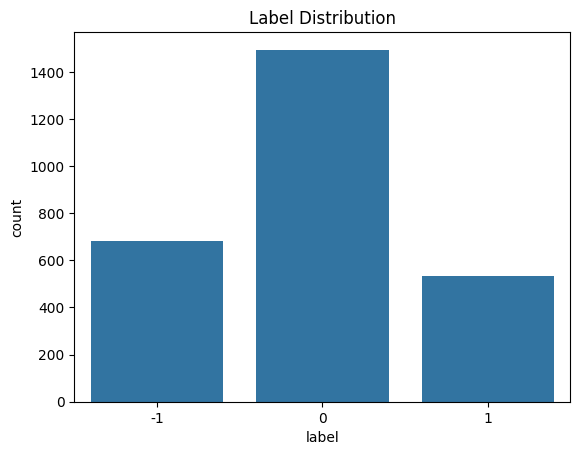

In [3]:
sns.countplot(x="label",data=df).set(title="Label Distribution")

In [4]:
df['length']=df['comment_text'].apply(len)
df

,comment_text,label,length
0,Thật ra cái cfs nói ko sai mà. Lứa dv 8x còn c...,0,244
1,JCW có bộ Tội Ác Kinh Hoàng hay qá trời mỗi tộ...,1,82
2,"Lee Min Ho đẹp trai mà một màu quá, đóng vai g...",0,82
3,Xem SJK đóng cậu út nhà tài phiệt thấy tụt moo...,-1,128
4,Trong này t công nhận diễn xuất của 3 ông\nKSH...,1,55
...,...,...,...
2704,Dm ad viết t đọc t còn nhục hộ đám fan luôn ấy :),-1,49
2705,Viết cái lyric thôi cũng éo ra hồn nữa là prod...,-1,128
2706,"Tại con người ai cũng biết ngại, rất tiếc ảnh ...",-1,62
2707,Dẹp cái ông jack vớ vẩn này luôn đi cho trong ...,-1,127


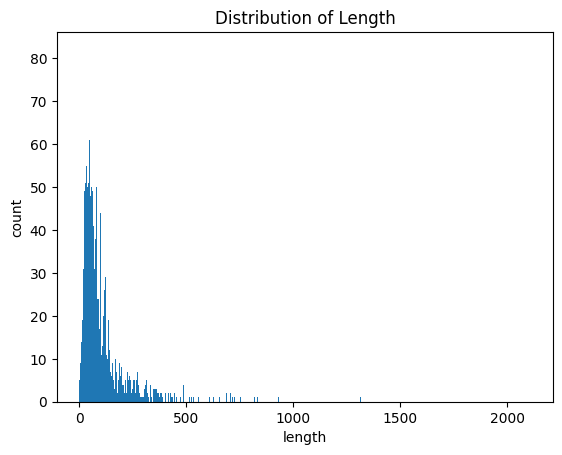

In [5]:
plt.hist(df['length'],bins=1000)
plt.xlabel('length')
plt.ylabel('count')
plt.title('Distribution of Length')
plt.show()

In [6]:
negative=df[df['label']==-1]
neutral=df[df['label']==0]
positive=df[df['label']==1]

In [7]:
negative.head()

,comment_text,label,length
3,Xem SJK đóng cậu út nhà tài phiệt thấy tụt moo...,-1,128
39,Chơi đ.á rồi viết bài à. Đừng kéo anti cho KSH...,-1,160
41,Từ hồi li hôn là mặt SJK nó lồ lộ bản chất @@,-1,45
50,SJK giữ nhiệt bằng cách tạo drama,-1,33
78,Khanh Linh Tran t thấy ông này k có dáng ô chù...,-1,273


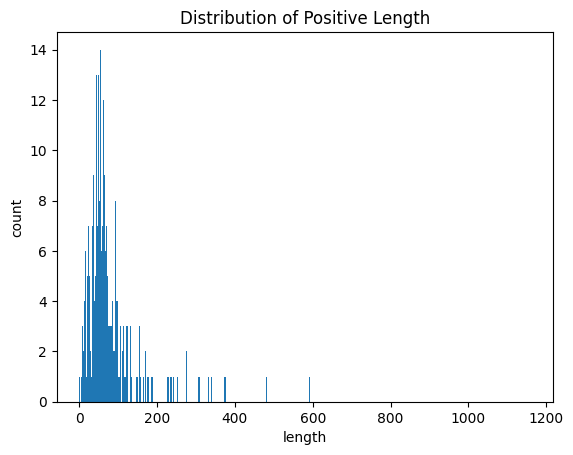

In [8]:
plt.hist(positive['length'],bins=1000)
plt.xlabel('length')
plt.ylabel('count')
plt.title('Distribution of Positive Length')
plt.show()

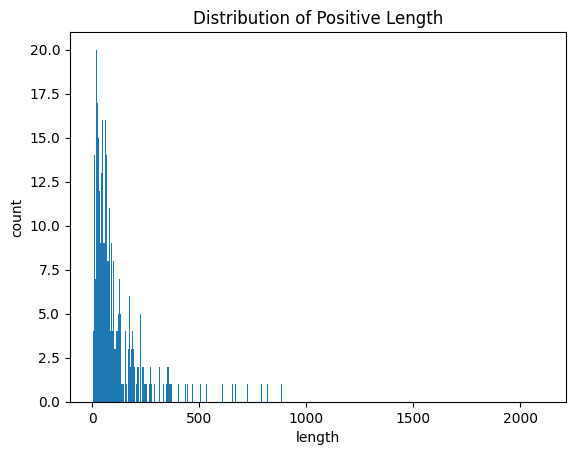

In [9]:
plt.hist(negative['length'],bins=1000)
plt.xlabel('length')
plt.ylabel('count')
plt.title('Distribution of Positive Length')
plt.show()

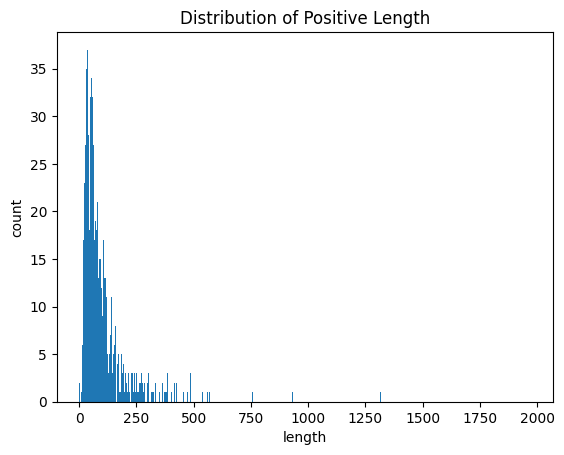

In [10]:
plt.hist(neutral['length'],bins=1000)
plt.xlabel('length')
plt.ylabel('count')
plt.title('Distribution of Positive Length')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['comment_text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [13]:
# Chuyển đổi văn bản thành vectơ đặc trưng sử dụng CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Xây dựng mô hình Decision Tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_vec, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = clf.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6199261992619927
Classification Report:
               precision    recall  f1-score   support

          -1       0.55      0.45      0.49       142
           0       0.67      0.73      0.70       291
           1       0.56      0.56      0.56       109

    accuracy                           0.62       542
   macro avg       0.59      0.58      0.58       542
weighted avg       0.61      0.62      0.62       542



In [18]:
!pip install nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
import nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 217.9 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.0 kB 220.2 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 184.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 2.6 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 3.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.5 MB 3.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.1/1.5 MB 3.5 MB/s eta 0:00:01
   ---------------

In [27]:
vietnamese_stopwords=pd.read_csv("Vietnamese_data/vietnamese-stop-words.txt")

In [29]:

def preprocess_text(text):
    # Chuyển đổi thành chữ thường
    text = text.lower()
    # Loại bỏ các ký tự đặc biệt
    text = re.sub(r'\W', ' ', text)
    # Loại bỏ các từ không mang nhiều ý nghĩa
    text = ' '.join([word for word in text.split() if word not in vietnamese_stopwords])
    return text

In [36]:
def common_text(df):
    df['cleaned_text'] = df['comment_text'].apply(preprocess_text)
    word_counter = Counter()
    for text in df['cleaned_text']:
        word_counter.update(text.split())

    # In ra các từ được sử dụng nhiều nhất
    print("Các từ được sử dụng nhiều nhất:")
    for word, count in word_counter.most_common(10):
        print(f"{word}: {count}")

    # Thống kê các cụm từ (n-grams)
    vectorizer = CountVectorizer(ngram_range=(2, 4))  # Tạo ra các bigram và trigram
    X = vectorizer.fit_transform(df['cleaned_text'])
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    # In ra các cụm từ được sử dụng nhiều nhất
    print("\nCác cụm từ (n-grams) được sử dụng nhiều nhất:")
    for word, count in words_freq[:10]:
        print(f"{word}: {count}")

In [37]:
common_text(df)

Các từ được sử dụng nhiều nhất:
là: 1143
có: 1011
mà: 891
thì: 867
hát: 686
này: 582
cũng: 567
của: 549
ko: 532
không: 531

Các cụm từ (n-grams) được sử dụng nhiều nhất:
ca sĩ: 128
giọng hát: 83
người ta: 75
hát hay: 72
trấn thành: 66
âm nhạc: 65
có thể: 61
kết hợp: 60
đàn ông: 57
ko phải: 51


In [38]:
common_text(positive)

C:\Users\vupho\AppData\Local\Temp\ipykernel_15164\2728172635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['comment_text'].apply(preprocess_text)


Các từ được sử dụng nhiều nhất:
là: 155
hay: 143
của: 142
mà: 115
hát: 111
quá: 106
này: 104
luôn: 104
có: 100
và: 97

Các cụm từ (n-grams) được sử dụng nhiều nhất:
kết hợp: 39
phụ nữ: 24
giọng hát: 23
tinh tế: 21
hát hay: 21
bài hát: 20
bà cam: 20
xứng đáng: 19
thông điệp: 18
âm nhạc: 18


In [39]:
common_text(negative)

C:\Users\vupho\AppData\Local\Temp\ipykernel_15164\2728172635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['comment_text'].apply(preprocess_text)


Các từ được sử dụng nhiều nhất:
là: 292
thì: 267
có: 265
mà: 245
nó: 189
cái: 180
hát: 176
cũng: 174
này: 166
như: 148

Các cụm từ (n-grams) được sử dụng nhiều nhất:
đàn ông: 42
đàn bà: 25
ăn cháo: 24
cháo đá: 23
ăn cháo đá: 23
thằng này: 22
đá bát: 22
cháo đá bát: 22
ăn cháo đá bát: 22
người ta: 21


In [55]:
df

,comment_text,label,length,cleaned_text
0,Thật ra cái cfs nói ko sai mà. Lứa dv 8x còn c...,0,244,thật ra cái cfs nói ko sai mà lứa dv 8x còn ch...
1,JCW có bộ Tội Ác Kinh Hoàng hay qá trời mỗi tộ...,1,82,jcw có bộ tội ác kinh hoàng hay qá trời mỗi tộ...
2,"Lee Min Ho đẹp trai mà một màu quá, đóng vai g...",0,82,lee min ho đẹp trai mà một màu quá đóng vai gì...
3,Xem SJK đóng cậu út nhà tài phiệt thấy tụt moo...,-1,128,xem sjk đóng cậu út nhà tài phiệt thấy tụt moo...
4,Trong này t công nhận diễn xuất của 3 ông\nKSH...,1,55,trong này t công nhận diễn xuất của 3 ông ksh ...
...,...,...,...,...
2704,Dm ad viết t đọc t còn nhục hộ đám fan luôn ấy :),-1,49,dm ad viết t đọc t còn nhục hộ đám fan luôn ấy
2705,Viết cái lyric thôi cũng éo ra hồn nữa là prod...,-1,128,viết cái lyric thôi cũng éo ra hồn nữa là prod...
2706,"Tại con người ai cũng biết ngại, rất tiếc ảnh ...",-1,62,tại con người ai cũng biết ngại rất tiếc ảnh k...
2707,Dẹp cái ông jack vớ vẩn này luôn đi cho trong ...,-1,127,dẹp cái ông jack vớ vẩn này luôn đi cho trong ...


In [40]:
common_text(neutral)

C:\Users\vupho\AppData\Local\Temp\ipykernel_15164\2728172635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['comment_text'].apply(preprocess_text)


Các từ được sử dụng nhiều nhất:
là: 696
có: 646
thì: 535
mà: 531
hát: 399
ko: 355
không: 345
cũng: 331
này: 312
của: 287

Các cụm từ (n-grams) được sử dụng nhiều nhất:
ca sĩ: 96
người ta: 53
giọng hát: 51
trấn thành: 39
so sánh: 34
có thể: 33
âm nhạc: 33
bài này: 32
không biết: 32
hát hay: 32
